<h1> Algorithmic Trading in Python </h1>
<a href = "https://www.freecodecamp.org/news/algorithmic-trading-in-python/"> Thank you for the Guide </a>

In [15]:
#importing required packages
import pandas as pd
import quandl as q
import yfinance as yf

In [12]:
# set the API key
q.ApiConfig.api_key = 'eMDVBLm-mHos3L-_Vn27'

In [19]:
#send a get request to query Microsoft's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019
#msft_data = q.get("EOD/MSFT", start_date="2010-01-01", end_date="2019-01-01") - using quandl

msft_data = yf.download('MSFT', start='2010-01-01', end='2019-01-01')
#look at the first 5 rows of the dataframe
msft_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.800222,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.807911,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.661810,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.415730,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.577221,51197400


In [20]:
#print the DataFrame's info, we can see all that it contains:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [21]:
#Summary statistics of the data
msft_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,48.070428,48.480839,47.635742,48.078754,42.897215,4.163436e+07
std,23.918008,24.122417,23.658304,23.896496,24.257013,2.348979e+07
min,23.090000,23.320000,22.730000,23.010000,17.857407,7.425600e+06
25%,28.887499,29.190001,28.615001,28.860001,23.277830,2.586055e+07
50%,41.369999,41.674999,41.040001,41.469999,36.132755,3.620060e+07
75%,57.872499,58.067501,57.427499,57.889999,53.096055,5.172612e+07
max,115.419998,116.180000,114.930000,115.610001,110.825478,3.193179e+08


<b> Pandas’ resample() method </b> is used to facilitate control and flexibility on the frequency conversion of the time series data. We can specify the time intervals to resample the data to monthly, quarterly, or yearly, and perform the required operation over it.

In [23]:
msft_data.resample('M').mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,30.287895,30.584211,29.830526,30.146842,23.182604,7.156057e+07
2010-02-28,28.323684,28.563158,28.064737,28.356316,21.854470,5.656017e+07
2010-03-31,29.253478,29.477391,29.044348,29.258696,22.604842,4.827118e+07
2010-04-30,30.438572,30.750476,30.255714,30.522857,23.581515,6.281093e+07
2010-05-31,28.285000,28.616500,27.749000,28.117000,21.764608,8.600651e+07


<h1> Calculating Returns </h1>

In [24]:
#import numpy package
import numpy as np

In [28]:
#assign 'Adj Close' to 'daily_close'
daily_close = msft_data[['Adj Close']]

#returns as fractional change
daily_return = daily_close.pct_change() ## The formula used in pct_change() is: Return = {(Price at t)-(Price at t-1)}/{Price at t-1}

#replacing NA values with 0
daily_return.fillna(0, inplace=True)

print(daily_return)

            Adj Close
Date                 
2010-01-04   0.000000
2010-01-05   0.000323
2010-01-06  -0.006137
2010-01-07  -0.010400
2010-01-08   0.006897
...               ...
2018-12-24  -0.041739
2018-12-26   0.068310
2018-12-27   0.006165
2018-12-28  -0.007808
2018-12-31   0.011754

[2264 rows x 1 columns]


In [30]:
# Calculate monthly returns
# apply() takes in a function and applies it to each and every row of the Pandas series.
# THe lambda function is an anonymous function in Python which can be defined without a name, and only takes expression in the following format: Lamda: expression
mdata = msft_data.resample('M').apply(lambda x: x[-1]) 
monthly_return = mdata.pct_change()

<h1> Moving Averages in Trading </h1>

In [33]:
# assigning adjusted closing prices to 
adj_price = msft_data['Adj Close']

# calculate the moving average
mav = adj_price.rolling(window=50).mean()

# print the result
print(mav[-10:])

Date
2018-12-17    103.429623
2018-12-18    103.281788
2018-12-19    103.153103
2018-12-20    102.955408
2018-12-21    102.811508
2018-12-24    102.593455
2018-12-26    102.429041
2018-12-27    102.314335
2018-12-28    102.119232
2018-12-31    101.952410
Name: Adj Close, dtype: float64


<AxesSubplot:xlabel='Date'>

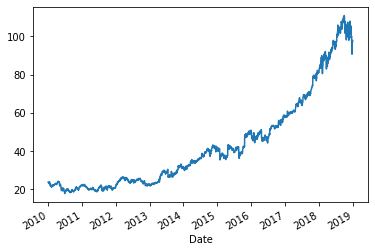

In [36]:
# import the matplotlib package to see the plot
import matplotlib.pyplot as plt
adj_price.plot()

<AxesSubplot:xlabel='Date'>

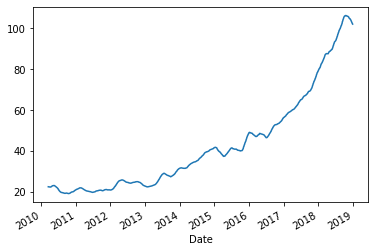

In [37]:
#plot the rolling mean()
mav.plot()

<h1> Momentum-based Simple Moving Average Crossover (SMAC) strategy </h1>
The SMAC strategy is a well-known schematic momentum strategy. It is a long-only strategy. Momentum, here, is the total return of stock including the dividends over the last n months. This period of n months is called the lookback period.

There are 3 main types of lookback periods: short term, intermediate-term, and long term. We need to define 2 different lookback periods of a particular time series.

A buy signal is generated when the shorter lookback rolling mean (or moving average) overshoots the longer lookback moving average. A sell signal occurs when the shorter lookback moving average dips below the longer moving average.

In [45]:
# step1: initialize the short and long lookback periods
short_lb = 50
long_lb = 120

# step2: initialize a new DataFrame called signal_df with a signal column
signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0

# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = msft_data['Adj Close'].rolling(window=short_lb, min_periods=1, center=False).mean()

In [48]:
# step4: create long simple moving average over the long lookback period
signal_df['long_mav'] = msft_data['Adj Close'].rolling(window=long_lb, min_periods=1, center=False).mean()

# step5: generate the signals based on the conditional statement
signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)

# step6: create the trading orders based on the positions column
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]

,signal,short_mav,long_mav,positions
Date,,,,
2010-06-07,0.0,22.460458,22.497515,-1.0
2011-03-31,0.0,21.011322,21.018860,-1.0
2012-06-21,0.0,24.715622,24.725259,-1.0
2012-11-14,0.0,24.378682,24.415479,-1.0
2013-09-19,0.0,27.629379,27.649516,-1.0
2015-02-09,0.0,40.392853,40.408298,-1.0
2015-09-18,0.0,40.248597,40.269634,-1.0
2016-03-21,0.0,47.036414,47.077462,-1.0
2016-06-10,0.0,47.704486,47.731915,-1.0


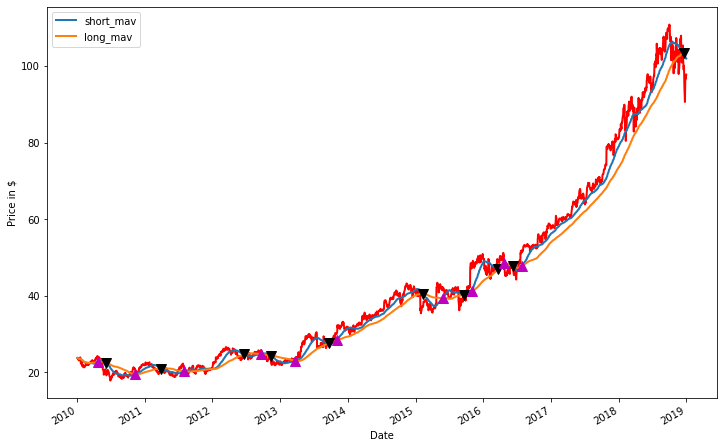

In [56]:
# initialize the plot using plt
fig = plt.figure()

# Add a subplot and label for y-axis
plt1 = fig.add_subplot(111,  ylabel='Price in $')
msft_data['Adj Close'].plot(ax=plt1, color='r', lw=2.)

# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))

# plotting the sell signals
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index, signal_df.short_mav[signal_df.positions == -1.0],'v', markersize=10, color='k')

# plotting the buy signals
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, signal_df.short_mav[signal_df.positions == 1.0],'^', markersize=10, color='m')